<a href="https://colab.research.google.com/github/Ianmzi/Potential-neuronal-action/blob/main/pf_programacion_ian%20(2)%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cambios que hice:
- modifiqué algunos de los parámetros
- desusé la def boltzmann(V, V_half, k) porque no sabía si jalaba,
  la saqué para irla testeando, y como jaló ya no la regresé
- dejé pendiente encuadrar bien las ceroclinas y el ciclo para ver las curvas de la ceroclina de V
- puse una diferencia entre:

V_half_n = -40
kn = 6
V_half_m = -20
km = 16

por eso saqué tu función de boltzmann


<h4 style="color: #800080;"> MODELO HODKING & HUXLEY SISTEMA NO LINEAL </h4>

#### Introducción al sistema.
El modelo planteado para

$\textbf{El potencial de membrana:}$
\begin{eqnarray}
\frac{dV}{dt} = \frac{I_{inyec} - \bar{g}_l(V-E_l) - \bar{g}_{Na} m_{\infty}(V) (V-E_{Na}) - \bar{g}_K n (V-E_K)}{C_m }\\
\end{eqnarray}
$\textbf{El cambio en la aactivación de los canales de potasio:}$
\begin{eqnarray}
\frac{dn}{dt} = \frac{n_{\infty}(V) - n}{\tau_n}\\
\end{eqnarray}



In [ ]:
import numpy as np
import matplotlib.pylab as gr

<h4 style="color: magenta;"> Definición de los métodos numéricos cómo función RK4</h4>

In [ ]:
    # Definir la función numérica RK4 que contiene las cond. iniciales ic, la función f que define al sistema de EDOs y de un
    # diccionario que contiene los parámetros p de la simulación.
def RK4vec(ic, f, p):
    # Crear un array que representa los puntos en el tiempo con un tamaño de paso h
    t = np.arange(p['tinit'], p['tfinal'], p['h'])
    # Crear la matriz de solución U donde cada fila representa un instante de tiempo y cada columna una variable del sistema
    U = np.zeros((len(t), len(ic)))   # U es un vector de dos elementos
    # Establecer condiciones iniciales para la primera fila t[0]
    U[0] = ic

    # Calcular para las demás filas definiendo RK4 cómo se vió en clase
    for i in range(1,len(t)):
        k1 = f(U[i-1])*p['h']
        k2 = f(U[i-1]+k1/2)*p['h']
        k3 = f(U[i-1]+k2/2)*p['h']
        k4 = f(U[i-1]+k3)*p['h']
        U[i] = U[i-1]+(k1+2*k2+2*k3+k4)/6

    # Se transpone la matriz para que cada fila corresponda a una variable y cada columna a un instante de tiempo
    return U.transpose()

<h4 style="color: magenta;"> Diccionario</h4>

In [ ]:
# 1. Definición de Parámetros y Funciones Auxiliares
q_neuro = {
    'C_m': 1.0,
    'g_L': 8, #0.3,
    'E_L': -80, #-54.4, # potencial de reposo recalibrado
    'g_Na': 20, #120.0,
    'E_Na': 60, # 50.0,
    'g_K': 10, #36.0,
    'E_K': -100, # -77.0,
    'I_inyec': 4.8, #10.0,

    # INACTIVACIÓN
    'Vm': -40.0,  # mV voltaje medio de inactivación del sodio
    'kn': -6.0,  # mV inactivación del sodio
    'tau_n': 5.0, # constante de tiempo para generar histéresis

    # Parámetros para el sodio rápido (m)
    'Vm_m': -40.0,
    'km': -6.0,

    # Configuración de simulación RK4
    'h': 0.05,
    'tinit': 0,
    'tfinal': 100
}

V_half_n = -40
kn = 6
V_half_m = -20
km = 16

<h4 style = "color: rgb(0, 128, 0);">Definición de la función F(x) a estudiar</h4>

In [ ]:
# Función Sigmoide de Boltzmann
def boltzmann(V, V_half, k):
    return 1.0 / (1.0 + np.exp((V_half - V) / k))

# Sistema de Ecuaciones
def modelo_neurona(U):
    V, n = U

    m_val = 1.0 / (1.0 + np.exp((V_half_m - V) / km))
    n_inf_val = 1.0 / (1.0 + np.exp((V_half_n - V) / kn))
    dn = (n_inf_val - n) / q_neuro['tau_n']

    # Corrientes
    I_L = q_neuro['g_L'] * (V - q_neuro['E_L'])
    I_Na = q_neuro['g_Na'] * m_val * (V - q_neuro['E_Na'])
    I_K = q_neuro['g_K'] * n * (V - q_neuro['E_K'])
    dV = (q_neuro['I_inyec'] - I_L - I_Na - I_K) / q_neuro['C_m']

    return np.array([dV, dn])

<h4 style="color: #FF0000;">Gráfica de soluciones vs tiempo con UNA condición inical</h4>

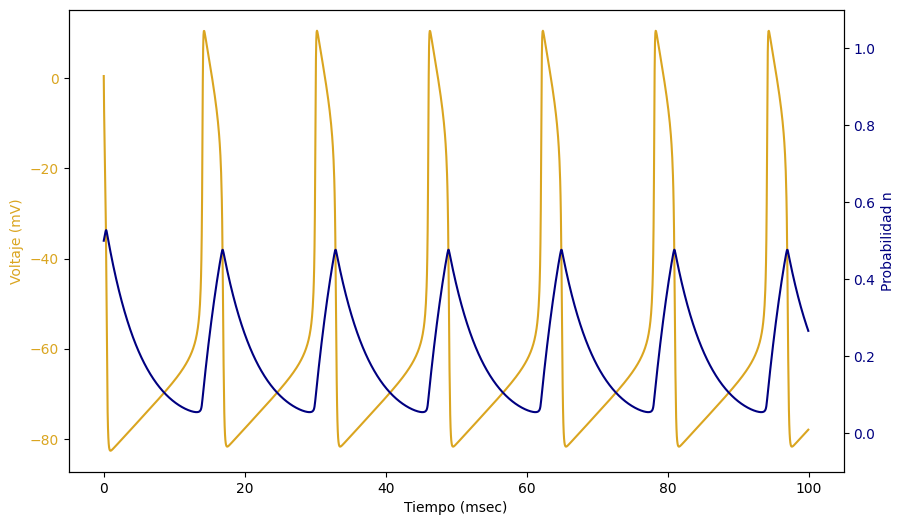

In [ ]:
# 5. Código de Gráfica Corregido con Nuevos Colores
fig, ax1 = gr.subplots(figsize=(10, 6))

# Eje izquierdo para Voltaje (V) - DORADO
color_v = 'goldenrod'
line_v, = ax1.plot(t, x_orbit, color=color_v, label='Voltaje (mV)')
ax1.set_ylabel('Voltaje (mV)', color=color_v)
ax1.tick_params(axis='y', labelcolor=color_v)
ax1.set_xlabel('Tiempo (msec)')

# Eje derecho para n (Variable de Recuperación) - AZUL MARINO
color_n = 'navy'
ax2 = ax1.twinx()
line_n, = ax2.plot(t, y_orbit, color=color_n, label='Variable n')
ax2.set_ylabel('Probabilidad n', color=color_n)
ax2.set_ylim(-0.1, 1.1)
ax2.tick_params(axis='y', labelcolor=color_n)

Explicación

<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\d'
C:\Users\End User\AppData\Local\Temp\ipykernel_12516\2326345949.py:42: SyntaxWarning: invalid escape sequence '\d'
  gr.plot(v_plot, V_nullcline(v_plot), 'b--', linewidth=2, label='Ceroclina V ($\dot{V}=0$)')
C:\Users\End User\AppData\Local\Temp\ipykernel_12516\2326345949.py:43: SyntaxWarning: invalid escape sequence '\d'
  gr.plot(v_plot, n_nullcline(v_plot), 'r-', linewidth=2, label='Ceroclina n ($\dot{n}=0$)')


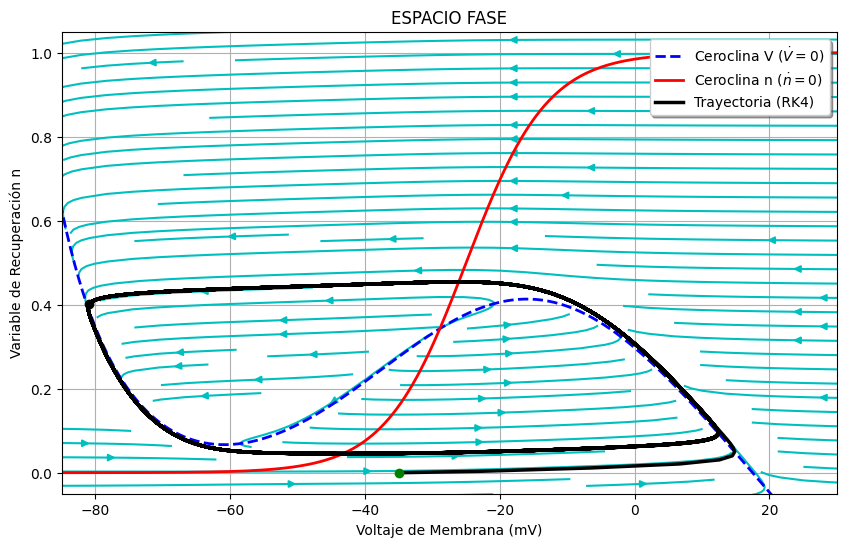

In [ ]:
# Intervalos para el campo y nuclinas
v_interval = np.arange(-90.0, 50.0, 2.0) # Rango extendido para ver todo
n_interval = np.arange(-0.1, 1.1, 0.1)
V_mesh, n_mesh = np.meshgrid(v_interval, n_interval) # mallado

# Componentes del sistema no lineal
m_inf_mesh = sigmoide_vec(V_mesh, V_half_m, km)
n_inf_mesh = sigmoide_vec(V_mesh, V_half_n, kn)
I_L_mesh = q_neuro['g_L'] * (V_mesh - q_neuro['E_L'])
I_Na_mesh = q_neuro['g_Na'] * m_inf_mesh * (V_mesh - q_neuro['E_Na'])
I_K_mesh = q_neuro['g_K'] * n_mesh * (V_mesh - q_neuro['E_K'])

# Sistema no lineal
dV_dt = (q_neuro['I_inyec'] - I_L_mesh - I_Na_mesh - I_K_mesh) / q_neuro['C_m']
dn_dt = (n_inf_mesh - n_mesh) / q_neuro['tau_n']


# Ceroclinas del sistema
def V_nullcline(V_arr):
    m_val = sigmoide_vec(V_arr, V_half_m, km)
    num = q_neuro['I_inyec'] - q_neuro['g_L']*(V_arr - q_neuro['E_L']) - q_neuro['g_Na']*m_val*(V_arr - q_neuro['E_Na'])
    den = q_neuro['g_K'] * (V_arr - q_neuro['E_K'])
    return num / den

def n_nullcline(V_arr):
    return sigmoide_vec(V_arr, V_half_n, kn)

# --- Grafica del espacio fase ---
gr.figure(figsize=(10, 6))
gr.title('ESPACIO FASE')
gr.xlabel('Voltaje de Membrana (mV)')
gr.ylabel('Variable de Recuperación n')

#  Campo de Direcciones (flujo del sistema)
gr.streamplot(V_mesh, n_mesh, dV_dt, dn_dt, color='c', density=1.2)

#  Intersección de ceroclinas (punto fijo)
## el pf se calcula analíticamente

# Ceroclinas
v_plot = np.linspace(-90, 60, 500)
gr.plot(v_plot, V_nullcline(v_plot), 'b--', linewidth=2, label='Ceroclina V ($\dot{V}=0$)')
gr.plot(v_plot, n_nullcline(v_plot), 'r-', linewidth=2, label='Ceroclina n ($\dot{n}=0$)')

# Trayectoria numérica (solución RK4)
gr.plot(x_orbit, y_orbit, 'k', linewidth=2.5, label='Trayectoria (RK4)')
gr.plot(x_orbit[0], y_orbit[0], 'go', zorder=5) # Punto inicio
gr.plot(x_orbit[-1], y_orbit[-1], 'ko', zorder=5) # Punto final

# Ajustes
gr.axis([-85, 30, -0.05, 1.05])
gr.legend(loc='upper right', shadow=True)
gr.grid(True)
gr.show()

Explicación

In [ ]:
# parte 2
